### Постановка задачи

### Нахождение корней нелинейного уравнения

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import pandas as pd

***

### Постановка задачи

<u>Цель</u>: найти корни уравнения f(x) = 0 модифицированным методом Ньютона

<u>Исходные данные</u>: f(x) - непрерывная, имеющая непрерывные производные до второго порядка функция.

<u>Модельные представления</u>: уравнение может иметь один или несколько вещественных или комплексных, простых или кратных корней, или не иметь ни одного.

<u>Критерий оценки результата</u>: $ |f(x)| \leq \epsilon $

($ \epsilon $ - заданная абсолютная погрешность вычислений)

***

1. Локализовать вещественные корни уравнения $ f(x) = 0 $ для
$$ f(x) = x^2 - \cos (\pi x)^2 $$

In [2]:
def f(x):
    return x**2 - np.cos(np.pi * x)**2

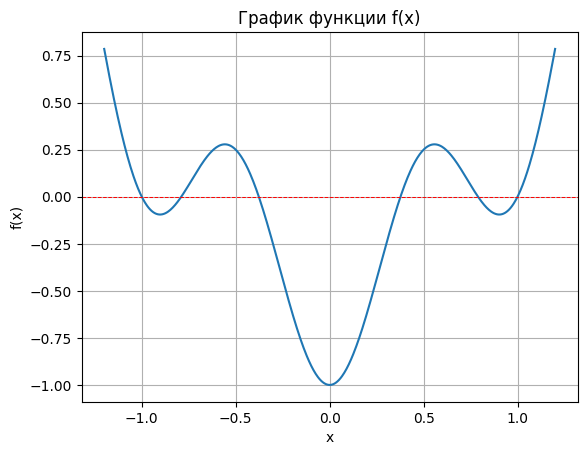

In [3]:
x = np.linspace(-1.2, 1.2, 600)
y = f(x)

# Построение графика функции f(x)
plt.plot(x, y)
plt.axhline(0, color='r', linestyle='--', lw=0.7)  # Горизонтальная линия y=0 для наглядности
plt.title('График функции f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

Функция пересекает ось абсцисс в шести точках, примерно в: (-1, -0.9), (-0.8, -0.7), (-0.5, -0.3), (0.3, 0.5), (0.7, 0.8), (0.9, 1).

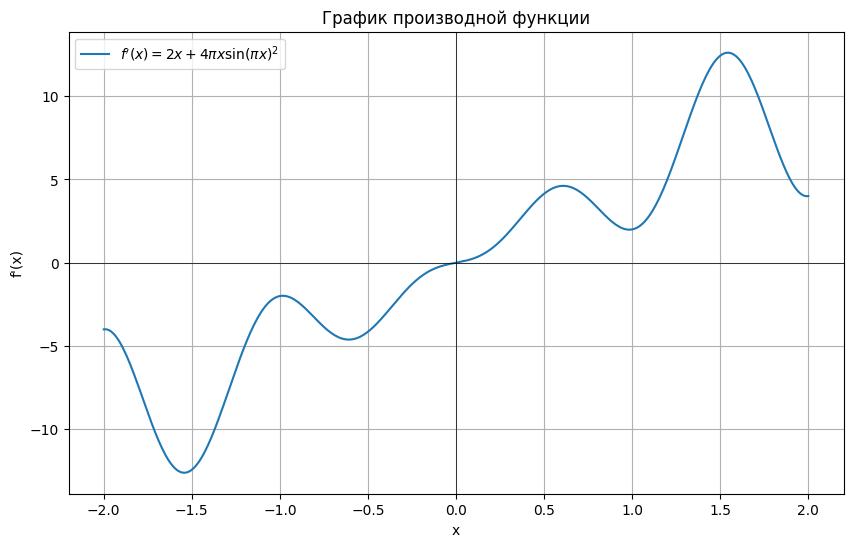

In [57]:
# Создание массива x значений
x = np.linspace(-2, 2, 400)
y = df(x)

# Построение графика производной f'(x)
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="$f'(x) = 2x + 4\pi x\sin(\pi x)^2$")
plt.xlabel('x')
plt.ylabel('f\'(x)')
plt.title('График производной функции')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

In [5]:
roots_localization = []

x_range = np.linspace(-1.2, 1.2, 1000)

# Шаг для поиска корней
step = 0.01

for x in x_range:
    y = f(x)
    
    # Проверяем, близко ли значение функции к нулю
    if abs(y) < 0.01:
        roots_localization.append({'x': x, 'f(x)': y})

df = pd.DataFrame(roots_localization)
display(df)

,x,f(x)
0,-1.003003,0.006104
1,-1.000601,0.001205
2,-0.998198,-0.003568
3,-0.995796,-0.008216
4,-0.796396,-0.009456
5,-0.793994,-0.006031
6,-0.791592,-0.002564
7,-0.789189,0.000943
8,-0.786787,0.004491
9,-0.784384,0.008075


***

2. Найти любой из корней этого уравнения с точностью $ 0.5 * 10^{-9} $ с использованием гибридного алгоритма:
* выполнить итерации метода бисекций до достижения оценки погрешности $ 10^{-2} $;
* далее выполнять итерации с помощью упрощенного метода Ньютона.


#### Метод бисекций

* Интервал локализации [a, b] разбивается на два простых отрезка точкой $ x_0 = a + \frac{1}{2} (b - a) $ и дальше делится тот отрезок, на концах которого функция имеет разные знаки.
* Вычисления прекращаются, если $ (b - a) \leq 2 \epsilon $.

In [36]:
def bisection_method(a, b, eps):
    iterations = 1
    while (b - a) > 2 * eps:
        if (iterations > 30):
            break
        
        x_mid = (a + b) / 2.0
        f_mid = f(x_mid)
        
        if f_mid == 0.0:
            return x_mid  # Корень найден
        elif f(a) * f_mid < 0:
            b = x_mid
        else:
            a = x_mid
            
        iterations += 1

    return x_mid, iterations

#### Упрощённый метод Ньютона

$$ x_{k+1} = x_k - \frac{f(x_k)}{f^{'}(x_0)}, k = 0, 1, \dots $$

Критерий окончания итерационного процесса при заданной абсолютной погрешности вычислений $ \epsilon $:

$$ |x_k - x_{k+1}| \leq \epsilon $$

In [54]:
# Производная f(x)
def df(x):
    return 2 * x + 2 * np.pi * x * np.sin(np.pi * x)**2

def newton_method(initial_guess, eps):
    iterations = 1
    x = initial_guess
    def1 = df(initial_guess)
    while True:
        if (iterations > 30):
            break
                x_next = x - f(x) / def1
        if abs(x_next - x) <= eps:
            return x_next, iterations  # Корень найден
        x = x_next
        
        iterations += 1

Найдём корень уравнения с заданной точностью:

In [55]:
# Метод бисекций с погрешностью 1e-2
root_approximation, iter1 = bisection_method(0.3, 0.5, 1e-2)

# Нахождение корне с погрешностью 0.5e-9
final_root, iter2 = newton_method(root_approximation, 0.5e-9)

***

3. Напечатать значение $ |f(x)| $ для полученного приближённого значения корня и число выполненных итераций.

In [56]:
print("Корень на интервале (0.5, 0.6)")
print("Приближенный корень уравнения:", round(final_root, 4))
print("Значение |f(x)| в найденном корне:", round(abs(f(final_root)), 15))
print("Количество выполненных итераций:")
print("Методом бисекций: ", iter1, "| Упрощённым методом Ньютона: ", iter2)

Корень на интервале (0.5, 0.6)
Приближенный корень уравнения: 0.377
Значение |f(x)| в найденном корне: 3.972e-12
Количество выполненных итераций:
Методом бисекций:  5 | Упрощённым методом Ньютона:  5


***

## Контрольные вопросы:

2.	Укажите условие для выбора начального приближения в методе Ньютона. Продемонстрируйте возможное нарушение сходимости метода в случае, когда это условие нарушено.

Условие сходимости метода Ньютона:

$$ \frac{1}{2} \frac{M}{m} |x_0 - x^{*}| <1 $$

Это условие означает, что сходимость зависит от выбора начального приближения.



Начальное приближение необходимо выбрать так, чтобы произведение функции и её второй производной были положительные.

$$ f(x_0) + f^{'}(x_0)(x - x_0) = 0 $$
$$ x_1 = x_0 - \frac{f(x_0)}{f^{'}(x_0)} $$

![Alt text](im1.png)

В общем случае, если задан отрезок [a, b], содержащий корень, и известно, что функция f(x) монотонна на этом отрезке, то в качестве начального приближения можно выбрать ту границу отрезка , где совпадают знаки функции f(x) и второй производной f''(x). Такой выбор начального приближения гарантирует сходимость метода Ньютона при условии монотонности функции на отрезке локализации корня.

---

3.	Что является условием окончания итераций в методе Ньютона для решения нелинейного уравнения $ f(x) = 0 $. Ответ обосновать.

Критерий окончания итерационного процесса при заданной абсолютной погрешности вычислений $ \epsilon $:

$$ |x_k - x_{k+1}| \leq \epsilon $$

где $ x_k $ - текущее приближение к корню на k-й итерации, а $ x_{k+1} $ - приближение к корню на следующей итерации.

1. Этот критерий гарантирует , что последовательность приближений $ x_k $ сходится к истинному корню $ x^{*} $ уравнения f(x)=0 при достаточно малой абсолютной погрешности $ \epsilon $.
2. Он позволяет контролировать точность приближённого решения.

![Alt text](https://cf.ppt-online.org/files/slide/f/f8lej0HTJa9OhYI5xubvDcPszZAF7wVBidLgUQ/slide-2.jpg)

---

5.	Графически проиллюстрируйте упрощенный метод Ньютона для решения нелинейного уравнения $ f(x) = 0 $ и укажите порядок сходимости этого метода.

![Alt text](https://cf4.ppt-online.org/files4/slide/c/ciQgREn1Sz7JaNG8ZTv05qUIVLs9yOpkYMl6Bj/slide-27.jpg)

В отличие от метода Ньютона с квадратичной сходимостью, в упрощённом методе скорость сходимости линейна и имеет параметр сходимости:

$$ \alpha = 1 - \frac{m}{M} $$